# Basic of networkx

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

In [80]:
# !pip install networkx

In [81]:
"""Creating a Graph object and assigning it to G"""
G = nx.Graph()

"""To add a node"""
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)

"""To view the Node"""
G.nodes()     

NodeView((1, 2, 3, 4, 5, 6))

In [82]:
"""Adding Edges"""

G.add_edge(2,3)
G.add_edge(1,3)
G.add_edge(4,6)
G.add_edge(2,3)
G.add_edge(4,5)
G.add_edge(1,2)

"""View the edges"""
print(G.edges())

"""Adding another edge and viewing the change"""
G.add_edge(2,6)
print(G.edges())

[(1, 3), (1, 2), (2, 3), (4, 6), (4, 5)]
[(1, 3), (1, 2), (2, 3), (2, 6), (4, 6), (4, 5)]


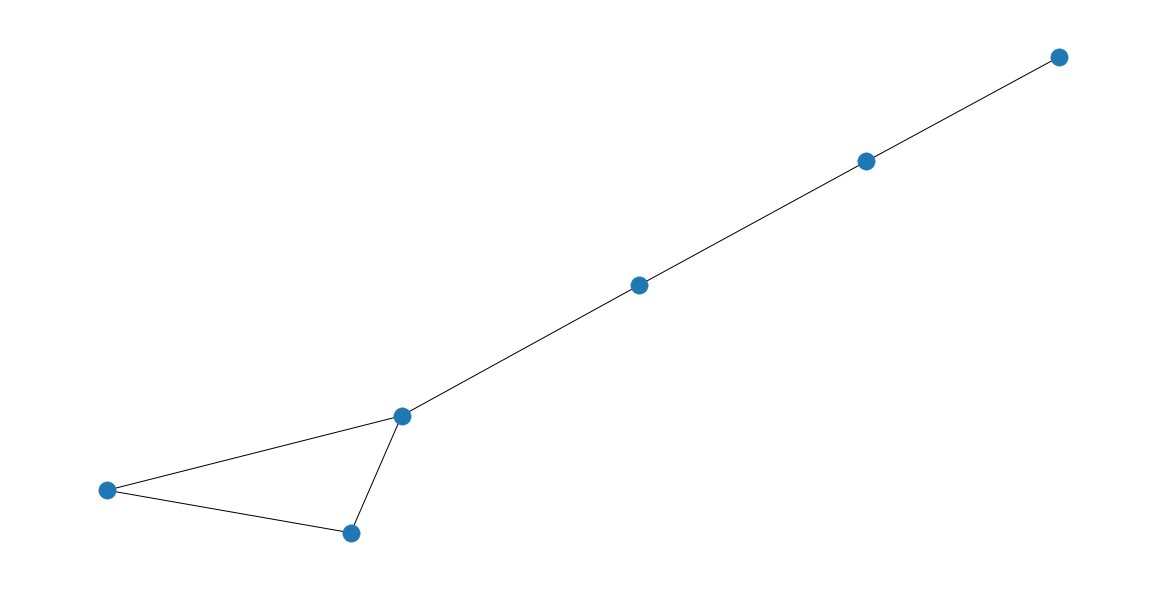

In [84]:
nx.draw(G)
plt.show()

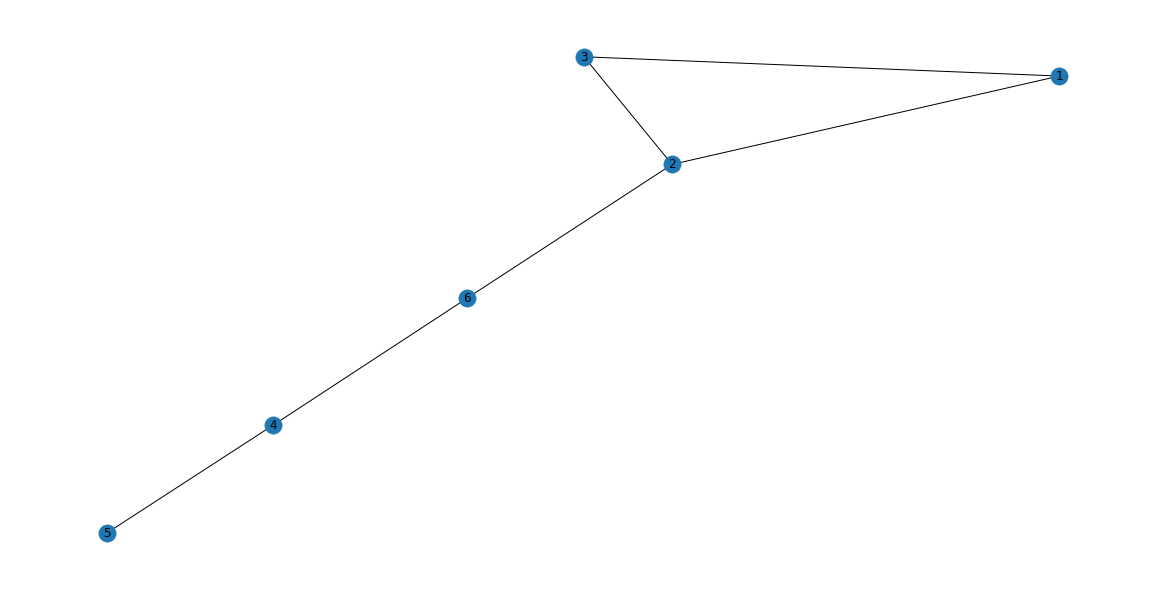

In [85]:
nx.draw(G, with_labels = True)
plt.show()

In [86]:
"""Complete Graph: Generates complete Graph of assigned vertices and assigns it to the variable mentioned
Complete Graph means it put all possible edges between these 10 (specified) nodes"""
Z = nx.complete_graph(10)
Z.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9))

In [87]:
print(Z.edges())

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]


In [88]:
"""Z.order() : Number of Nodes in the graph"""
print(Z.order())

"""Z.size() : Number of Edges in the Nodes"""
print(Z.size())

10
45


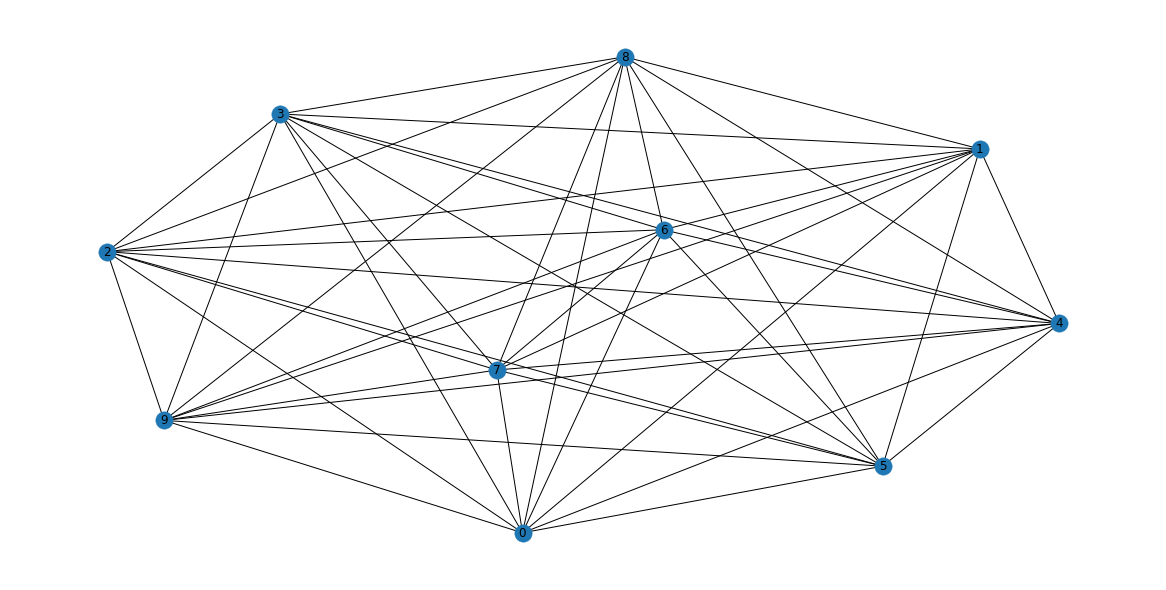

In [89]:
nx.draw(Z, with_labels = True)
plt.show()

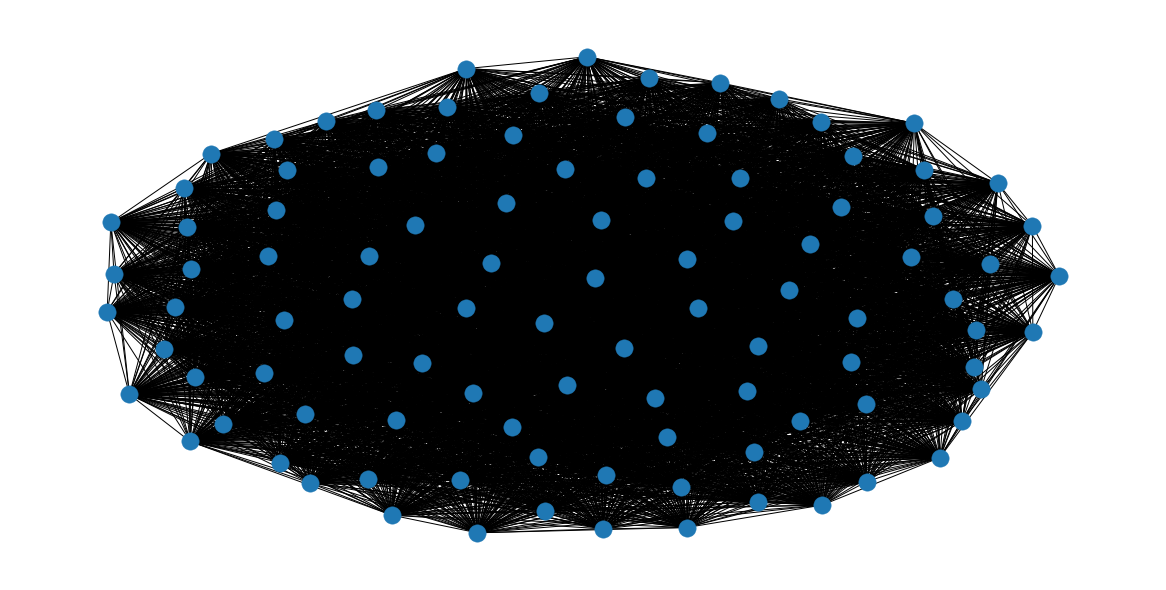

In [90]:
H = nx.complete_graph(100)
nx.draw(H)
plt.show()

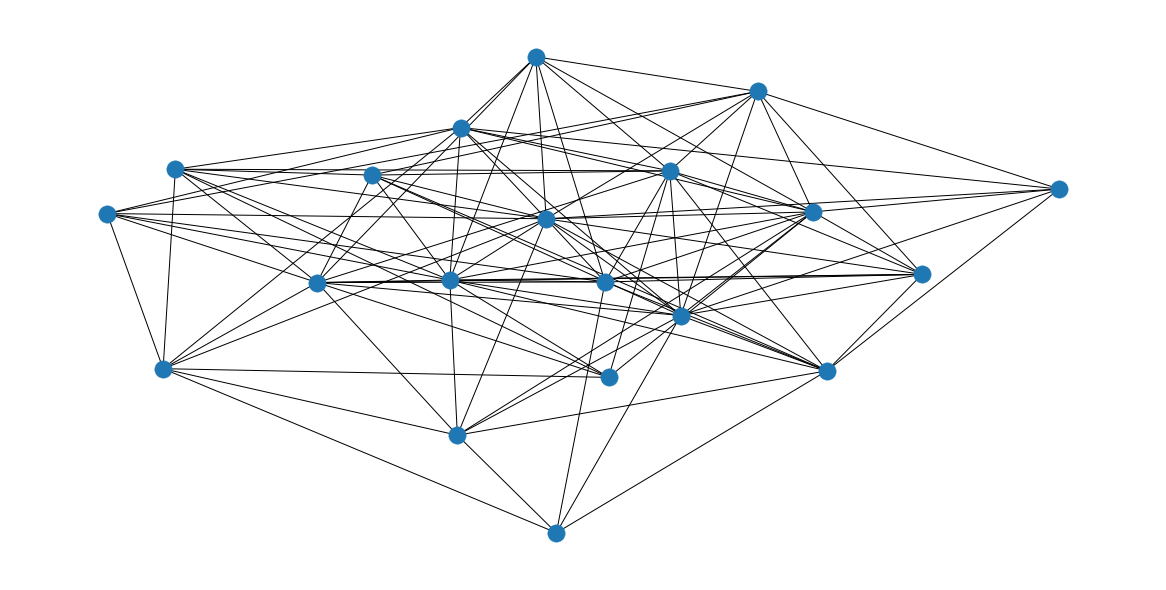

In [91]:
"""Built In Function:
 - nx.gnp_random_graph(20, 0.5):  Graph is generated on 20 vertices
                                 For edges we are using PROBABILITY 0.5
                                To understand, we put the edge when we get head and we dont put the edge when we get tail
                                We put the edge when prob = 0.5 and we dont put the edge when we get 1-0.5"""
G = nx.gnp_random_graph(20,0.5)
nx.draw(G)
plt.show()

 # Modelling road network of India's cities

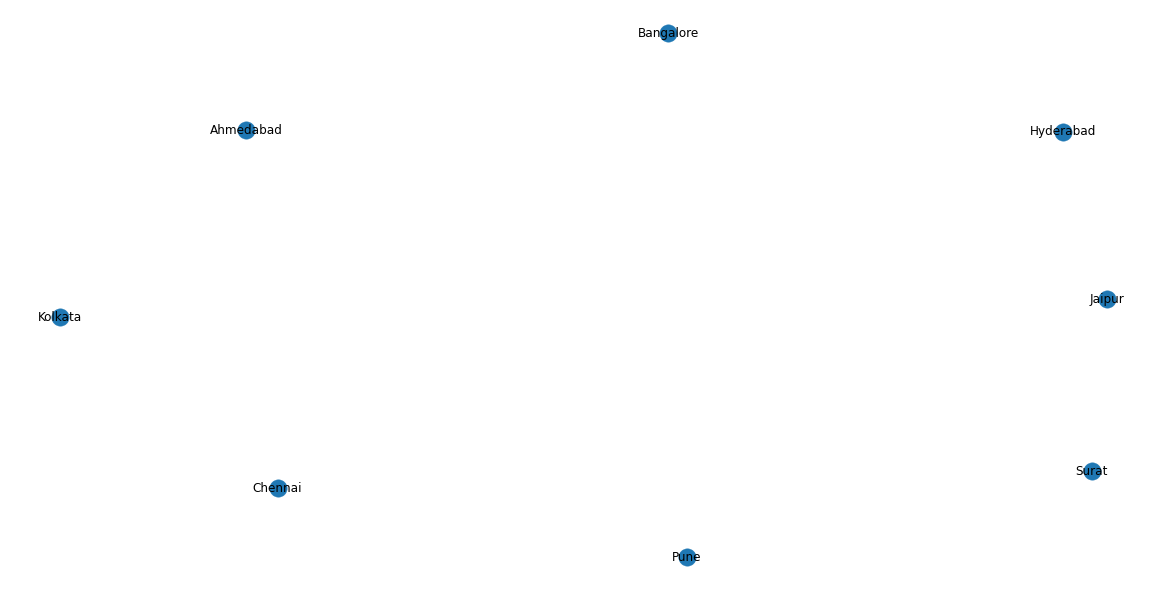

In [2]:
G = nx.Graph()   # Unidirected Network Graph
"""G = nx.DiGraph() # Directed Network Graph"""

city_set = [ 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Chennai', 'Kolkata', 'Surat', 'Pune', 'Jaipur']

for each in city_set:
    G.add_node(each)  # adds node to each city
    
nx.draw(G, with_labels = 1)
plt.show()

In [93]:
"""
G.number_of_edges() :  shows number of edges in network
G.has_edge(c1,c2): returns True if node has the specified edges. Else: False
"""



'\nG.number_of_edges() :  shows number of edges in network\nG.has_edge(c1,c2): returns True if node has the specified edges. Else: False\n'

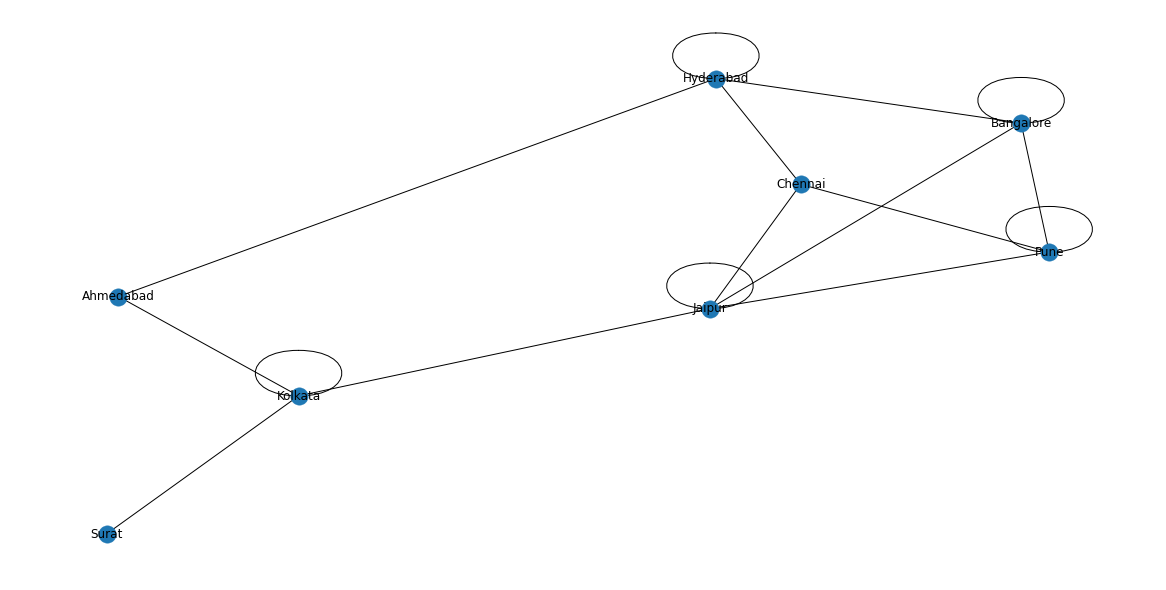

In [100]:
"""Add edges between the cities"""
# Adding random edges and cost which will be stored in the list and later on picked from that list

costs = []
value = 100     # we will add 20 values in costs: 100-2000
while value<= 2000:
    costs.append(value)
    value += 100
    
#  adding 16 edges to this network
while G.number_of_edges() < 16:
#     Now we choose two nodes randomly 
    c1 = random.choice(list(G.nodes()))
    c2 = random.choice(list(G.nodes()))
    """
    We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
    Also another situation could be: when there is already an edge present in the node. Hence we use built in function has_edge() with if statement
    """
    if c1 != c2 or G.has_edge(c1,c2) == False:
#         we add weight
        w = random.choice(costs)
#         we add edge(c1,c2, weight = w)
        G.add_edge(c1,c2, weight = w)
    
nx.draw(G,with_labels = 1)
plt.show()

## Layout of the Graph

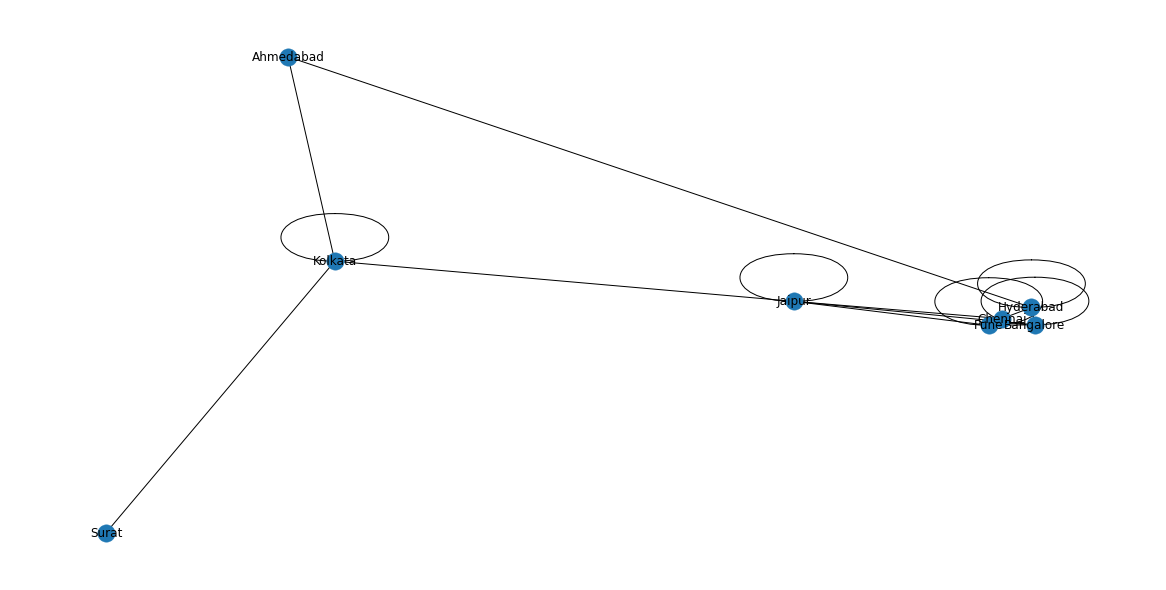

In [95]:
"""We can change the Layout of the Graph too"""

# Spectral Layout
pos = nx.spectral_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()



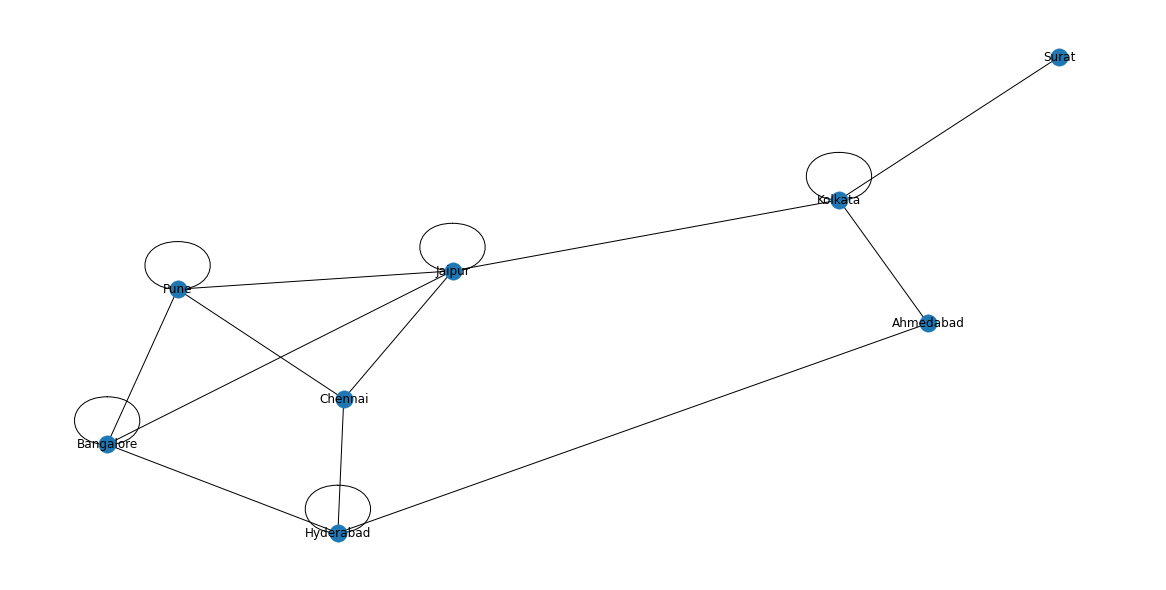

In [97]:
# Spring Layout
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

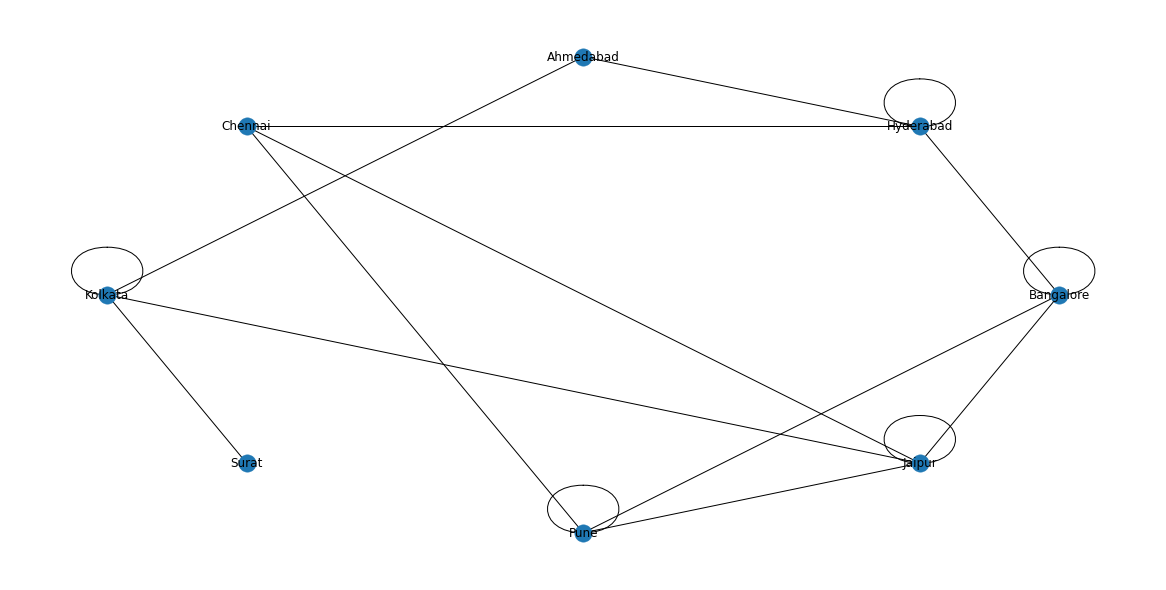

In [98]:
# Circular Layout
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
plt.show()

## Labelling Edge weights


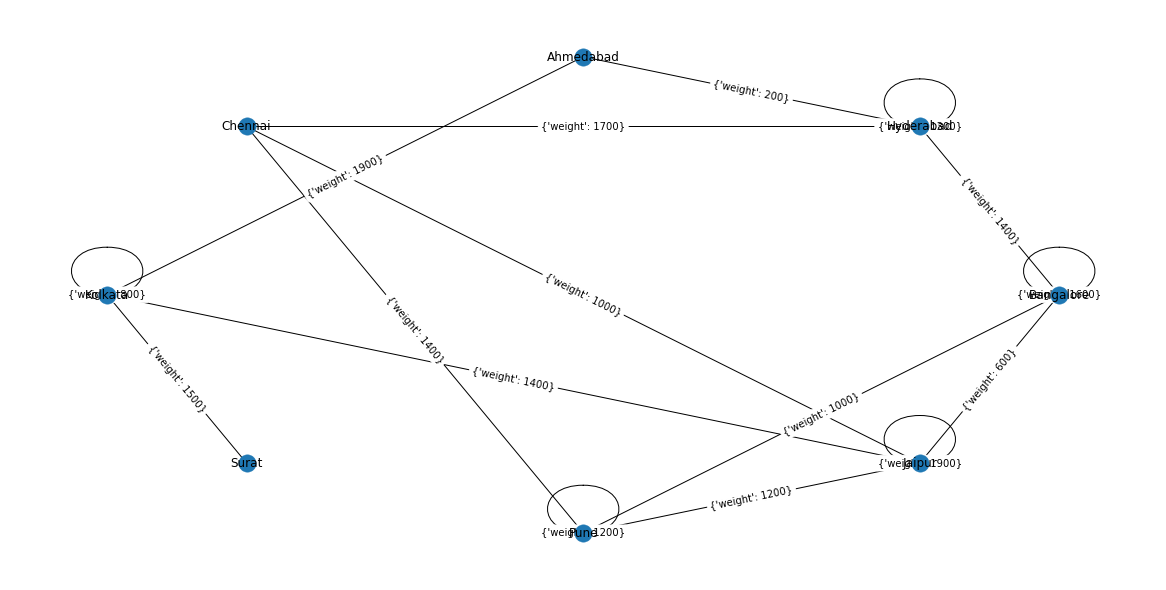

In [110]:

pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=1)
nx.draw_networkx_edge_labels(G, pos)

plt.show()

## Checking Paths between the cities
- Can we travel from one city to other: Yes, if graph is connected. Hence, first we check that.


In [101]:
"""nx.is_connected(G): Returns true if the graph is connected"""
print(nx.is_connected(G))

True


False


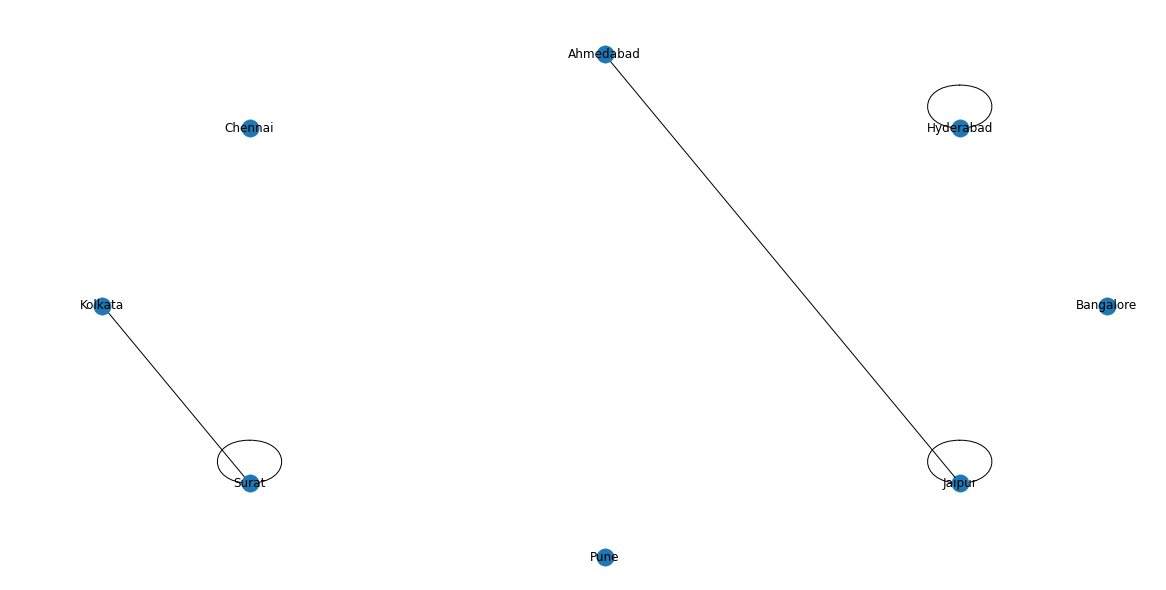

In [6]:
"""We make the network NOT connected for the purpose of the course
We can do that by reducing the number of edges (in the while loop)"""

costs = []
value = 100     # we will add 20 values in costs: 100-2000
while value<= 2000:
    costs.append(value)
    value += 100

#  adding 5 edges to this network: to make it disconnected network
while G.number_of_edges() <5:
#     Now we choose two nodes randomly 
    c1 = random.choice(city_set)
    c2 = random.choice(city_set)
    """
    We assign weights to the city: but we cannot assign weights to same city. hence we use if statement
    Also another situation could be: when there is already an edge present in the node. 
    Hence we use built in function has_edge() with if statement
    """
    if c1 != c2 or G.has_edge(c1,c2) == 0:
#         we add weight
        w = random.choice(costs)
#         we add edge(c1,c2, weight = w)
        G.add_edge(c1,c2, weight = w)
    
    
# """Checking if graph is disconnected now"""
print(nx.is_connected(G))
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = 1)
plt.show()

Bangalore Bangalore True
Bangalore Hyderabad False
Bangalore Ahmedabad False
Bangalore Chennai False
Bangalore Kolkata False
Bangalore Surat False
Bangalore Pune False
Bangalore Jaipur False
Hyderabad Bangalore False
Hyderabad Hyderabad True
Hyderabad Ahmedabad False
Hyderabad Chennai False
Hyderabad Kolkata False
Hyderabad Surat False
Hyderabad Pune False
Hyderabad Jaipur False
Ahmedabad Bangalore False
Ahmedabad Hyderabad False
Ahmedabad Ahmedabad True
Ahmedabad Chennai False
Ahmedabad Kolkata False
Ahmedabad Surat False
Ahmedabad Pune False
Ahmedabad Jaipur True
Chennai Bangalore False
Chennai Hyderabad False
Chennai Ahmedabad False
Chennai Chennai True
Chennai Kolkata False
Chennai Surat False
Chennai Pune False
Chennai Jaipur False
Kolkata Bangalore False
Kolkata Hyderabad False
Kolkata Ahmedabad False
Kolkata Chennai False
Kolkata Kolkata True
Kolkata Surat True
Kolkata Pune False
Kolkata Jaipur False
Surat Bangalore False
Surat Hyderabad False
Surat Ahmedabad False
Surat Chennai

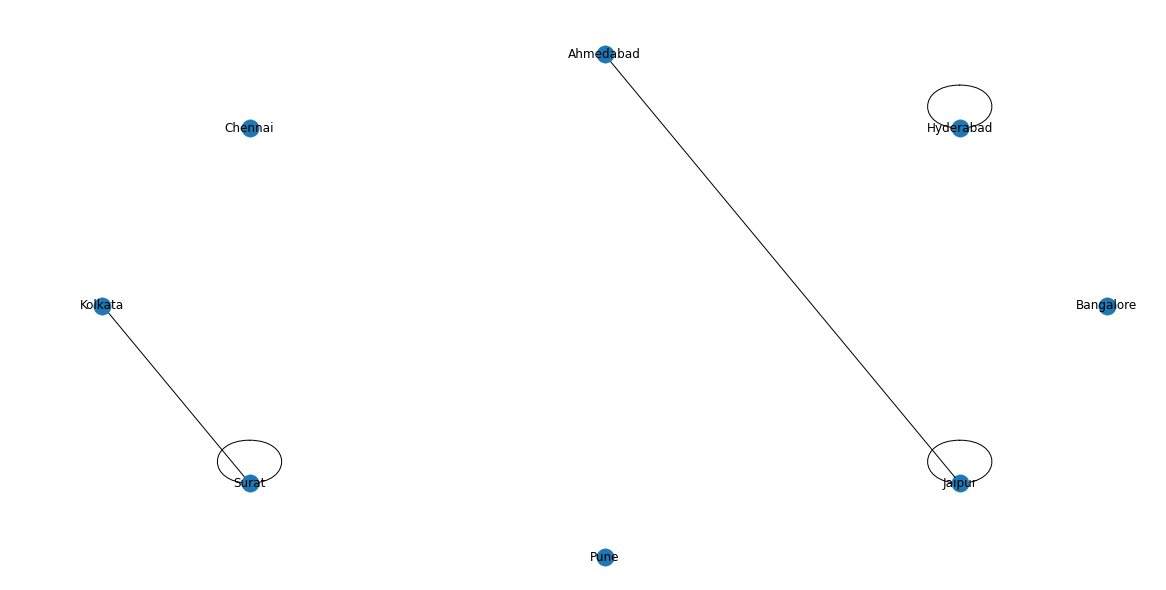

In [8]:
"""
Now we check if the path between two cities exists or not
.has_path(G,u,v): takes in Network, city1, city2 and returns True if path exists
"""

for u in G.nodes():
    for v in G.nodes():
        print(u,v,nx.has_path(G,u,v))
        
        
        
# Let's visualize the network simultaneously
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels = 1)
plt.show()